<a href="https://colab.research.google.com/github/berthine/Neural-Networks-for-Financial-Time-Series-Forecasting-/blob/main/Stock_price_forecasting_withLSTM_RNN_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Official Notebook of the paper [Neural Networks for Financial Time Series Forecasting ](https://pubmed.ncbi.nlm.nih.gov/35626542/) (May 2022)

# By Kady Sako, Berthine Nyunga Mpinda, and Paulo Canas Rodrigues



**Abstract**

Financial and economic time series forecasting has never been an easy task due to its sensibility to political, economic and social factors. For this reason, people who invest in financial markets and currency exchange are usually looking for robust models that can ensure them to maximize their profile and minimize their losses as much as possible. Fortunately, recently, various studies have speculated that a special type of Artificial Neural Networks (ANNs) called Recurrent Neural Networks (RNNs) could improve the predictive accuracy of the behavior of the financial data over time. This paper aims to forecast: (i) the closing price of eight stock market indexes; and (ii) the closing price of six currency exchange rates related to the USD, using the RNNs model and its variants: the Long Short-Term Memory (LSTM) and the Gated Recurrent Unit (GRU). The results show that the GRU gives the overall best results, especially for the univariate out-of-sample forecasting for the currency exchange rates and multivariate out-of-sample forecasting for the stock market indexes.

**Keywords:** Artificial Neural Networks (ANNs); Gated Recurrent Unit (GRU); Long Short-Term Memory (LSTM); Recurrent Neural Networks (RNNs); currency exchange rates; stock market indices data.



**Data Description**


The data considered in this paper includes two databases: (i) the daily stock data of eight stock market indices: the NYSE Composite (NYA) and NASDAQ Composite (IXIC) from America, the Euronext 100 (N100) and Deutsche Boese DAX index (GDAXI) from Europe, the SSE Composite index (000001.SS) and Nikkei 225 (N225) from Asia, and the Global X MSCI Nigeria ETF (NGE) and FTSE/JSE Africa index (J580.JO) from Africa; and (ii) the daily exchange rate of six currencies, in reference to the United States dollar (USD): South African rand (ZAR/USD), Nigeria Naira (NGN/USD), British Pound (GBP/USD), Euro (EUR/USD), Japanese yen (JPY/USD), and Chinese Renminbi (RBM/USD). The data was collected between 2 January 2008 and 28 May 2021, except for the two African currencies that were only available from 3 April 2013. There are some differences in the number of observations for each time series (see Table 1 and Table 2), with, e.g., J580.JO index having 51 missing values. Each data has six features which are: the High, Low, Close, Volume, Adjust Close and Open values. In this paper, we will focus on forecasting only the: (i) closing stock price for the eight stock indices, and (ii) closing prices of the six currency exchange rates. Both data sets were obtained from Yahoo Finance.

The following experiments are on the eight stock market indices.

### Importing important libraries




In [ ]:
#import seaborn as sns
#sns.set_style('whitegrid')
#plt.style.use("fivethirtyeight")
#%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
# Remote data access for pandas
import pandas_datareader as webreader
# Mathematical functions
import math
# Fundamental package for scientific computing with Python
import numpy as np
# Additional functions for analysing and manipulating data
import pandas as pd
# Date Functions
from datetime import date, timedelta, datetime
# This function adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt
# Formatting dates
import matplotlib.dates as mdates

In [ ]:
import tensorflow as tf

In [ ]:
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np
np.random.seed()
import time
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.regularizers import L1L2
from keras.layers import SimpleRNN
from keras import optimizers
import keras.backend as K

import sklearn
from sklearn.utils import check_array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

## (1.) Loading data to python

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.2 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
##### data: EUR/USD
##### Taking USD as a benchmark, EUR represent the currency used in Europe (Germany etc)

import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()


d_EURUSD= pdr.get_data_yahoo("EURUSD=X", start="2008-01-02", end="2021-05-28")
dataset = pd.DataFrame(d_EURUSD)
#print(df)
#d_EURUSD.to_csv('d_EURUSD.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
#dataset = pd.read_csv('d_CNYUSD.csv', index_col=0 )
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,1.462309,1.474296,1.460110,1.471692,1.471692,0
2008-01-03,1.471692,1.477891,1.469400,1.474491,1.474491,0
2008-01-04,1.474709,1.481811,1.469896,1.475492,1.475492,0
2008-01-07,1.475209,1.475209,1.466706,1.468299,1.468299,0
2008-01-08,1.559211,1.559284,1.552988,1.557099,1.557099,0


In [ ]:
dataset.shape

(3474, 6)

In [ ]:
dataset = dataset.drop(['Adj Close','Volume'],axis = 1)

In [ ]:
dataset.head(2)

,Open,High,Low,Close
Date,,,,
2008-01-02,1.462309,1.474296,1.46011,1.471692
2008-01-03,1.471692,1.477891,1.46940,1.474491


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3474 entries, 2008-01-02 to 2021-05-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3474 non-null   float64
 1   High    3474 non-null   float64
 2   Low     3474 non-null   float64
 3   Close   3474 non-null   float64
dtypes: float64(4)
memory usage: 135.7 KB


### Dataset consisting of only predictors (Feutures)

We will use all the stock indices to predict AMSTEOE stock index.

In [ ]:
stock_dataset = dataset
stock_dataset.head()
data1 = stock_dataset[['Close']]
data1.head()

,Close
Date,
2008-01-02,1.471692
2008-01-03,1.474491
2008-01-04,1.475492
2008-01-07,1.468299
2008-01-08,1.557099


In [ ]:
print('the shape of the predicting dataset is ', stock_dataset.shape)

the shape of the predicting dataset is  (3474, 4)


## (2.) Data setup for Input to RNN's

### Normalizing the data

We will normalize our data to values between 0 and 1 using the python's MinMaxScaler function.

In [ ]:
def normaliser(data,frange =(0,1)):
    #normaliser feutures
    scaler = MinMaxScaler(feature_range=frange)
    dt = data.values
    #dt = dt.reshape(-1,1)
    scaled = scaler.fit_transform(dt)
    return scaled, scaler

In [ ]:
#normalised_prices = normaliser(stock_dataset)

In [ ]:
scaler1 = MinMaxScaler(feature_range = (0,1))
scaler2 = MinMaxScaler(feature_range = (0,1))
normalised_prices = scaler1.fit_transform(stock_dataset.values)
#prices_n = scaler2.fit_transform(stock_dataset[:].values)
normalised_prices[0:5] #Taking a look at our normalized values
n = scaler2.fit_transform(data1)

### Transforming the time series into well labelled training and testing dataset

We will use the following function to transform time series into well labelled braining training and target samples. i.e we transform out input into a tuple (n_samples,n_timesteps,n_features)

In [ ]:
def rnn_data_setup(data, lookback, delay, min_index, max_index):
    '''
    data:     Shape (n_samples,n_features). First column is the time series, other columns are the features.
    lookback: Number of time steps in the RNN >= 1
    delay:    The number of time steps to predict >= 1.
    min_index,max_index: The starting and ending indices of the time series portion to construct the data.
                         Allows constructing validation and test sets from the series in proper shape
    Returns: A tuple (x,y) of numpy arrays where x is in shape (n_samples,n_timesteps,n_features) and
             y is in shape (n_samples,delay). y is an array of target arrays each of size delay. To forecast
             a single value n timesteps ahead, set delay = n and take the last element of the forecast array.
    '''
    n_samples=(max_index+1)-min_index-(lookback-1)-delay
    samples = np.zeros((n_samples,lookback,data.shape[-1]))
    targets = np.zeros((n_samples,delay))

    samp, targ = [], []
    for i in range(n_samples):
        indices1 = range(i, i+lookback)
        indices2 = range(i + lookback, i + lookback + delay)
        samples[i] = data[indices1]
        targets[i,:] = data[indices2][0:delay][:,0]
        #print(samples,targets)
    samp.append(samples);targ.append(targets)

    return np.array(samp)[0],np.array(targ)[0]

In [ ]:
lookback =5 #Rolling period/ window of 5 and 10 days was used
delay = 1
min_index = 0
max_index = 3375
xdata, ydata = rnn_data_setup(normalised_prices, lookback, delay, min_index, max_index)
print('The shape of the input sample set is: ',  xdata.shape)
print('The shape of the target set is: ', ydata.shape)

The shape of the input sample set is:  (3371, 5, 4)
The shape of the target set is:  (3371, 1)


### Splitting the dataset into the training and testing sets

We are splitting the dataset of normalized stock prices into 80$\%$ and 20$\%$ for training and testing respectively. 20 $\%$ of training set will be assigned for validation at later stage.

In [ ]:
#Specifying the sizes of training and testing datasets.
train_size = int(len(xdata)*0.6) # 2416#
valid_size = int(len(xdata)*0.2) #605#
test_size = len(xdata) - train_size-valid_size #355#

#Splitting the dataset into trainig, validation and testing.
xtrain, xvalid, xtest = xdata[0:train_size,:], xdata[train_size:train_size+valid_size,:], xdata[train_size+valid_size:len(xdata),:]
ytrain, yvalid, ytest = ydata[0:train_size,:], ydata[train_size:train_size+valid_size,:], ydata[train_size+valid_size:len(ydata),:]

print('The shape of the training sample is: ', xtrain.shape)
print('The shape of the validation sample is: ', xvalid.shape)
print('The shape of the testing sample is: ', xtest.shape)
print('The shape of the training target is: ', ytrain.shape)
print('The shape of the validation target is: ', yvalid.shape)
print('The shape of the testing target is: ', ytest.shape)

The shape of the training sample is:  (2022, 5, 4)
The shape of the validation sample is:  (674, 5, 4)
The shape of the testing sample is:  (675, 5, 4)
The shape of the training target is:  (2022, 1)
The shape of the validation target is:  (674, 1)
The shape of the testing target is:  (675, 1)


In [ ]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], -1))
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], -1))

## Recurrent Neural Networks Models

## (A.) SimpleRNN model

We will be are looking the best RNN model by looking the model's performance according to different variations in terms of its variables.  

#### Input variables

In [ ]:
n_features = dataset.shape[1]
lr = 0.0016#Learning rate
units = 16 #Number hidden units
batch_size=64

In [ ]:
#define the model
model1 = Sequential()
model1.add(keras.layers.SimpleRNN(units, activation = 'tanh', input_shape = (lookback, n_features), return_sequences =False,recurrent_dropout=0.3))
#model1.add(Dropout(0.2))
model1.add(Dense(1))
opt = Adam(lr)#, decay=1e-6)
model1.compile(optimizer = 'Adam' , loss = 'mse', metrics=["mae"])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 16)                336       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


### (i.) Fitting the model

In [ ]:
np.random.seed(1)
result1=model1.fit(xtrain,ytrain, validation_data=(xvalid,yvalid), epochs=100, verbose=1)

Epoch 1/100
64/64 [==============================] - 2s 9ms/step - loss: 0.1426 - mae: 0.2978 - val_loss: 0.0126 - val_mae: 0.1106
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0445 - mae: 0.1678 - val_loss: 0.0021 - val_mae: 0.0368
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0202 - mae: 0.1127 - val_loss: 0.0018 - val_mae: 0.0365
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0111 - mae: 0.0839 - val_loss: 0.0016 - val_mae: 0.0324
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0069 - mae: 0.0654 - val_loss: 0.0012 - val_mae: 0.0296
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0046 - mae: 0.0524 - val_loss: 9.2110e-04 - val_mae: 0.0260
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0031 - mae: 0.0424 - val_loss: 0.0010 - val_mae: 0.0269
Epoch 8/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0022

In [ ]:
df = pd.DataFrame(result1.history)
df.tail()

,loss,mae,val_loss,val_mae
95,0.000443,0.011064,0.000135,0.009581
96,0.000459,0.011977,0.000094,0.007726
97,0.000443,0.011234,0.000113,0.008611
98,0.000446,0.011446,0.000097,0.007838
99,0.000462,0.011964,0.000176,0.011282


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


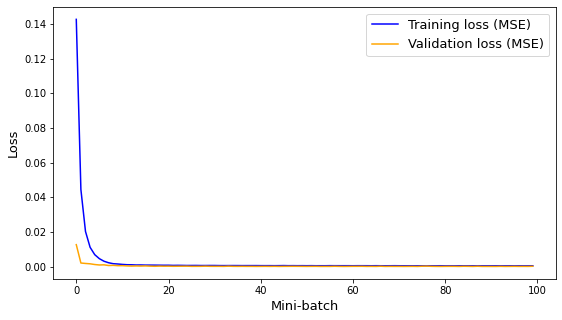

In [ ]:
print('')
plt.figure(figsize=(9,5))
plt.plot(df['loss'], label ='Training loss (MSE)', color = 'blue')
plt.plot(df['val_loss'], label='Validation loss (MSE)', color = 'orange')
plt.xlabel('Mini-batch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.legend(fontsize=13)
plt.savefig('RNN_error1.eps', format='eps', dpi=1000)
plt.show()

### (ii.) Predictions

Now we will use our model to make predictions.

In [ ]:
preds1 = model1.predict(xtest)
preds1.shape

(675, 1)

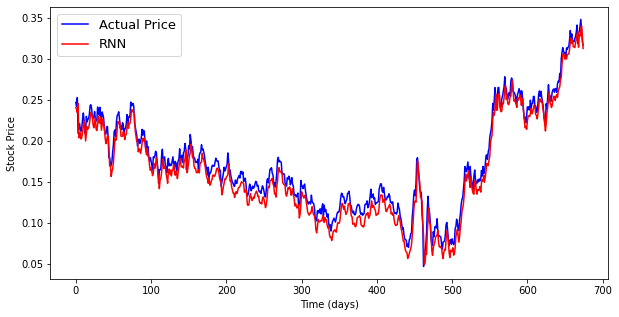

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(ytest, label="Actual Price", color = 'blue')
plt.plot(preds1, label="RNN", color = 'red')
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')
plt.legend(fontsize=13)
plt.show()

In [ ]:
#actuals = scaler2.inverse_transform(xtest)
real_pred1 = scaler2.inverse_transform(preds1)

In [ ]:
ytest=ytest.reshape(-1, 1)
actuals = scaler2.inverse_transform(ytest)

#### Plot of Actual Stock Prices

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


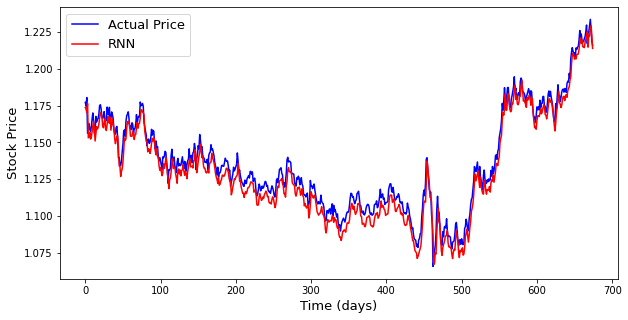

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals, label="Actual Price", color = 'blue')
plt.plot(real_pred1, label="RNN", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Stock Price', fontsize=13)
plt.legend(fontsize=13)
plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

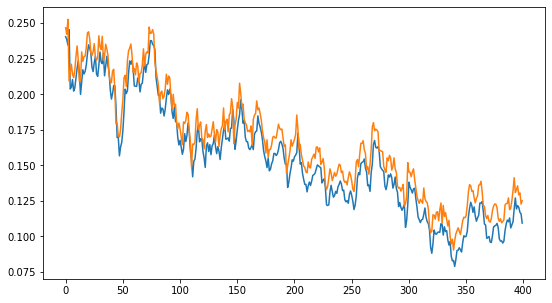

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(preds1[:400,:])
plt.plot(ytest[:400,:])
plt.show()

### (iii.) RNN Model MSE

In [ ]:
print('The the mean squared error committed by the standard RNN model is ', mean_squared_error(actuals,real_pred1))
print('The squaroot of the mean squared error committed by the standard RNN model is ', np.sqrt(mean_squared_error(actuals,real_pred1)))

The the mean squared error committed by the standard RNN model is  5.1377836824181265e-05
The squaroot of the mean squared error committed by the standard RNN model is  0.007167833481895437


### (iv.) RNN Model MAPE

In [ ]:
from keras.metrics import mean_absolute_percentage_error #MeanAbsolutePercentageError

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_pred)) * 100

In [ ]:
print('The the mean absolute percentage error committed by the standard RNN model is: ', mean_absolute_percentage_error(actuals,real_pred1))

The the mean absolute percentage error committed by the standard RNN model is:  0.5674227117739393


### (v.) RNN Model MAE

In [ ]:
print('The the mean absolute error committed by the standard RNN model is: ', mean_absolute_error(actuals,real_pred1))

The the mean absolute error committed by the standard RNN model is:  0.006384679156257223


## (B.) LSTM Model

In [ ]:
# Define the LSTM model
model2 = Sequential()
model2.add(LSTM(32, activation='tanh',input_shape = (lookback,dataset.shape[1]),return_sequences = True))#,recurrent_dropout=0.3))
#model2.add(LSTM(32),return_sequences = True))                 #,activation='tanh', return_sequences = True,recurrent_dropout=0.2))
#model2.add(Dropout(0.5))
model2.add(LSTM(32))
#model2.add(Dropout(0.5))
model2.add(Dense(1))
opt = Adam(lr=0.02)#, decay=1e-6)
model2.compile(loss='mse', optimizer=opt , metrics=["mae"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             4736      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,089
Trainable params: 13,089
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### (i.) Fitting the model

In [ ]:
#n_epochs =100
#valid_score = 0.2
start = time.time()
np.random.seed(1)
result2 = model2.fit(xtrain,ytrain,batch_size=300,epochs=150,validation_data=(xvalid,yvalid), verbose = 1)
print("> Compilation Time : ", time.time() - start)

Epoch 1/150
7/7 [==============================] - 5s 179ms/step - loss: 0.0643 - mae: 0.1905 - val_loss: 0.0185 - val_mae: 0.1301
Epoch 2/150
7/7 [==============================] - 0s 21ms/step - loss: 0.0098 - mae: 0.0798 - val_loss: 8.1010e-04 - val_mae: 0.0246
Epoch 3/150
7/7 [==============================] - 0s 20ms/step - loss: 0.0037 - mae: 0.0504 - val_loss: 0.0086 - val_mae: 0.0917
Epoch 4/150
7/7 [==============================] - 0s 20ms/step - loss: 0.0021 - mae: 0.0369 - val_loss: 0.0011 - val_mae: 0.0302
Epoch 5/150
7/7 [==============================] - 0s 20ms/step - loss: 0.0014 - mae: 0.0283 - val_loss: 2.9199e-04 - val_mae: 0.0135
Epoch 6/150
7/7 [==============================] - 0s 21ms/step - loss: 9.8259e-04 - mae: 0.0225 - val_loss: 7.2802e-04 - val_mae: 0.0233
Epoch 7/150
7/7 [==============================] - 0s 23ms/step - loss: 7.6712e-04 - mae: 0.0199 - val_loss: 3.2240e-04 - val_mae: 0.0145
Epoch 8/150
7/7 [==============================] - 0s 36ms/step -

In [ ]:
df2 = pd.DataFrame(result2.history)
df2.tail()

,loss,mae,val_loss,val_mae
145,0.000398,0.011537,0.000120,0.008640
146,0.000379,0.010836,0.000094,0.007338
147,0.000448,0.012833,0.000141,0.009662
148,0.000455,0.013565,0.000097,0.007712
149,0.000404,0.012072,0.000102,0.007925


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


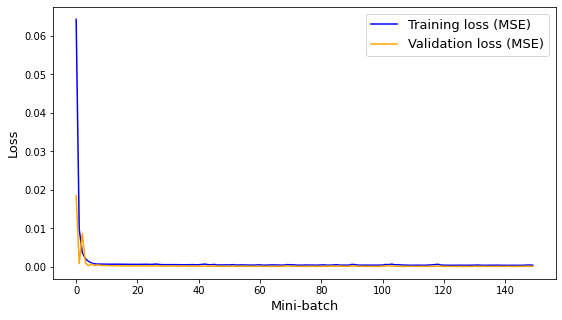

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(df2['loss'], label ='Training loss (MSE)', color = 'blue')
plt.plot(df2['val_loss'], label='Validation loss (MSE)', color = 'orange')
plt.xlabel('Mini-batch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.legend(fontsize=13)
plt.savefig('LSTM1_error.eps', format='eps', dpi=1000)
plt.show()

### (ii.) Predictions

In [ ]:
# Doing a prediction on all the test data at once
preds2 = model2.predict(xtest)

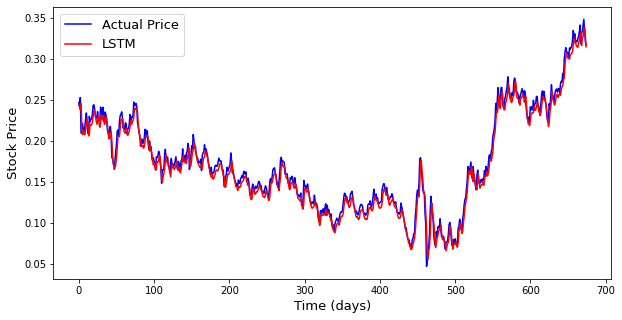

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ytest, label="Actual Price", color = 'blue')
plt.plot(preds2, label="LSTM", color = 'red')
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Stock Price', fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [ ]:
real_pred2 = scaler2.inverse_transform(preds2)

In [ ]:
ytest=ytest.reshape(-1, 1)
actuals = scaler2.inverse_transform(ytest)

#### Plot of Actual Stock Prices

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


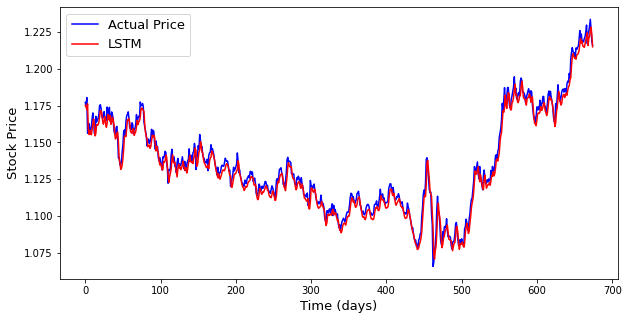

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(actuals, label="Actual Price", color = 'blue')
plt.plot(real_pred2, label="LSTM", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Stock Price', fontsize=13)
plt.legend(fontsize=13)
plt.savefig('LSTM_model1.eps', format='eps', dpi=1000)
plt.show()

### (iii.) LSTM Model MSE

In [ ]:
print('The the mean squared error committed by the LSTM model is ', mean_squared_error(actuals,real_pred2))
print('The squareroot of the mean squared error committed by the LSTM model is ', np.sqrt(mean_squared_error(actuals,real_pred2)))

The the mean squared error committed by the LSTM model is  2.5756176735044e-05
The squareroot of the mean squared error committed by the LSTM model is  0.005075054357841303


### (iv.) LSTM Model MAPE

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_pred)) * 100

In [ ]:
print('The the mean squared error committed by the  model is: ', mean_absolute_percentage_error(actuals,real_pred2))

The the mean squared error committed by the  model is:  0.35673429991267586


### (v.) RNN MAE

In [ ]:
print('The the mean absolute error committed by the standard RNN model is: ', mean_absolute_error(actuals,real_pred2))

The the mean absolute error committed by the standard RNN model is:  0.004049539598375389


## (C.) GRU Model

In [ ]:
! pip install tensorflow

     |████████████████████████████████| 462 kB 4.4 MB/s 


In [ ]:
import tensorflow as tf

In [ ]:
n_features =dataset.shape[1]
# define model
model3 = Sequential()
model3.add(keras.layers.GRU(128, activation='tanh', input_shape=(lookback, n_features)))
model3.add(Dropout(0.1801))
model3.add(Dense(1))
opt = tf.keras.optimizers.Adam(lr=0.0114)
model3.compile(optimizer = opt, loss='mse', metrics=["mae"])
model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               51456     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 51,585
Trainable params: 51,585
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### (i.) Fitting the model

In [ ]:
n_epochs = 150
valid_score = 0.2
start = time.time()
result3 = model3.fit(xtrain,ytrain,batch_size=200,epochs=n_epochs,validation_split=valid_score, verbose = 0)
model3.reset_states()
print("> Compilation Time : ", time.time() - start)

> Compilation Time :  42.87059259414673


In [ ]:
df3 = pd.DataFrame(result3.history)
df3.tail()

,loss,mae,val_loss,val_mae
145,0.000783,0.019227,0.000380,0.014671
146,0.000668,0.017060,0.000169,0.009600
147,0.000691,0.017083,0.000384,0.015680
148,0.000720,0.017355,0.000286,0.013687
149,0.000705,0.017389,0.000252,0.012211


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


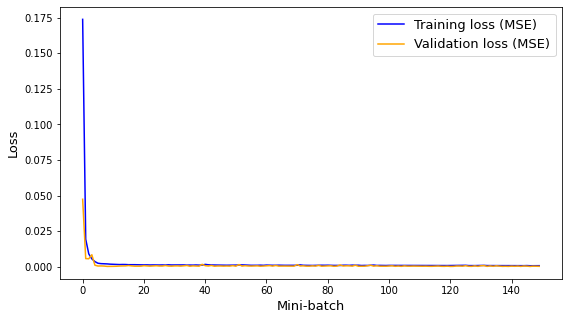

In [ ]:
print('')
plt.figure(figsize=(9,5))
plt.plot(df3['loss'], label ='Training loss (MSE)', color = 'blue')
plt.plot(df3['val_loss'], label='Validation loss (MSE)', color = 'orange')
plt.xlabel('Mini-batch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.legend(fontsize=13)
plt.savefig('GRU1_error.eps', format='eps', dpi=1000)
plt.show()

### (ii.) Predictions

In [ ]:
preds3 = model3.predict(xtest)

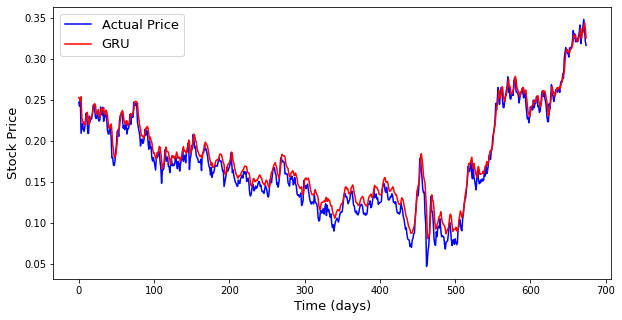

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(ytest, label="Actual Price", color = 'blue')
plt.plot(preds3, label="GRU", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Stock Price', fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [ ]:
real_pred3 = scaler2.inverse_transform(preds3)

In [ ]:
ytest=ytest.reshape(-1, 1)
actuals = scaler2.inverse_transform(ytest)

#### Plot of Actual Stock Prices

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


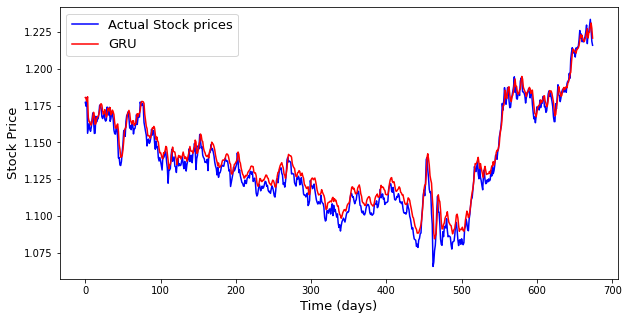

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals, label="Actual Stock prices", color = 'blue')
plt.plot(real_pred3, label="GRU", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Stock Price', fontsize=13)
plt.legend(fontsize=13)
plt.savefig('GRU_model1.eps', format='eps', dpi=1000)
plt.show()

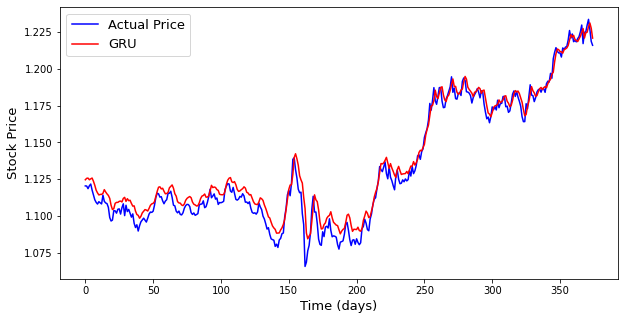

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(actuals[300:], label="Actual Price", color = 'blue')
plt.plot(real_pred3[300:], label="GRU", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Stock Price', fontsize=13)
plt.legend(fontsize=13)
plt.show()

### (iii.) GRU Model MSE

In [ ]:
print('The the mean squared error committed by the GRU model is ', mean_squared_error(actuals,real_pred3))
print('The squareroot of the mean squared error committed by the GRU model is ', np.sqrt(mean_squared_error(actuals,real_pred3)))

The the mean squared error committed by the GRU model is  4.366729133460884e-05
The squareroot of the mean squared error committed by the GRU model is  0.00660812313252476


### (iv.) GRU Model MAPE

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_pred)) * 100

In [ ]:
print('The the mean absolute percentage error committed by the GRU model is: ', mean_absolute_percentage_error(actuals,real_pred3))

The the mean absolute percentage error committed by the GRU model is:  0.4736774929483005


 ### (v.) GRU MAE

In [ ]:
print('The the mean absolute error committed by the standard RNN model is: ', mean_absolute_error(actuals,real_pred3))

The the mean absolute error committed by the standard RNN model is:  0.005370420552644398


## (D.) Combined Models

### Predicted Prices

In [ ]:
Pred_Data=pd.DataFrame({'RNN':real_pred1[:,0],'LSTM':real_pred2[:,0],'GRU':real_pred3[:,0], 'Actual Price':actuals[:,0]})
Pred_Data.head()

,RNN,LSTM,GRU,Actual Price
0,1.173710,1.175195,1.180566,1.177220
1,1.172575,1.174219,1.179751,1.174644
2,1.170351,1.172269,1.178015,1.180534
3,1.176456,1.176274,1.181061,1.156192
4,1.153100,1.158664,1.167001,1.159564


In [ ]:
#saving dataset of predicted prices
Pred_Data.to_csv('Pred_Data1.csv', sep = ',', header = True)

### Combined Plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


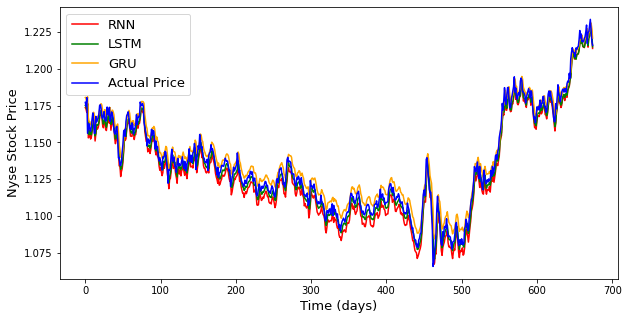

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Pred_Data['RNN'], color = 'red', label = 'RNN')
plt.plot(Pred_Data['LSTM'], color = 'green', label = 'LSTM')
plt.plot(Pred_Data['GRU'], color = 'orange', label = 'GRU')
plt.plot(actuals, color = 'blue', label = 'Actual Price')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Nyse Stock Price', fontsize=13)
plt.legend(fontsize=13)
plt.savefig('Combined1.eps', format='eps', dpi=1000)
plt.show()

## (E.) Average of the three models

In [ ]:
predmean1=pd.DataFrame({'RNN':real_pred1[:,0],'LSTM':real_pred2[:,0],'GRU':real_pred3[:,0]}).mean(axis=1)
predmean1.head()

0    1.176490
1    1.175515
2    1.173545
3    1.177930
4    1.159588
dtype: float32

In [ ]:
predmean1.to_csv('Average1.csv', sep = ',', header = True)

### Plot of the  Average of the 3 Models against the actual prices

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


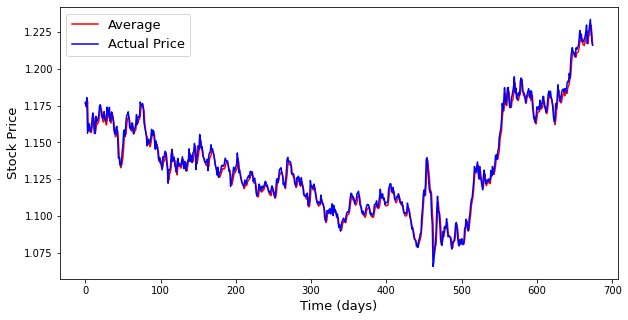

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(predmean1, color = 'red', label = 'Average')
plt.plot(actuals, color = 'blue', label = 'Actual Price')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Stock Price', fontsize=13)
plt.legend(fontsize=13)
plt.savefig('Average1.eps', format='eps', dpi=1000)
plt.show()

### Average Mean absolute Error (MSE)

In [ ]:
print('The the mean squared error committed by the average model is ', mean_squared_error(actuals,predmean1))
print('The squareroot of the mean squared error committed by the average model is ', np.sqrt(mean_squared_error(actuals,predmean1)))

The the mean squared error committed by the average model is  1.941943739559278e-05
The squareroot of the mean squared error committed by the average model is  0.004406749073363808


### Average Mean Absolute Percentage Error (MAPE)

In [ ]:
print('The the mean absolute percentage error committed by the average of the 3 models is: ', mean_absolute_percentage_error(actuals,predmean1)/23)

The the mean absolute percentage error committed by the average of the 3 models is:  0.14416976808879084


In [ ]:
print('The the mean absolute error committed by the average model is: ', mean_absolute_error(actuals,predmean1))

The the mean absolute error committed by the average model is:  0.0033741971385774032


If you use this code, please cite our work as follows:


**MDPI and ACS Style**

Sako, K.; Mpinda, B.N.; Rodrigues, P.C. Neural Networks for Financial Time Series Forecasting. Entropy 2022, 24, 657. https://doi.org/10.3390/e24050657

**AMA Style**

Sako K, Mpinda BN, Rodrigues PC. Neural Networks for Financial Time Series Forecasting. Entropy. 2022; 24(5):657. https://doi.org/10.3390/e24050657

**Chicago/Turabian Style**

Sako, Kady, Berthine Nyunga Mpinda, and Paulo Canas Rodrigues. 2022. "Neural Networks for Financial Time Series Forecasting" Entropy 24, no. 5: 657. https://doi.org/10.3390/e24050657

**APA Style**

Sako, K., Mpinda, B. N., & Rodrigues, P. C. (2022). Neural Networks for Financial Time Series Forecasting. Entropy, 24(5), 657. https://doi.org/10.3390/e24050657


Thank you for your interest!

**Kady S. and Berthine N.**